In [8]:
import os
import numpy as np
# import pytesseract
import easyocr
# import pytesserocr
import cv2
import matplotlib.pyplot as plt
import json


In [16]:
def read_image(image_path):
  
  try:
    img = cv2.imread(image_path)
    if img is None:
      raise Exception("Failed to read image: {}".format(image_path))
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB), img
  except Exception as e:
    print("Error reading image:", e)
    return None, None


def extract_id_card(img):
    """
    Extracts the ID card from an image containing a hand.

    Args:
        img (np.ndarray): The input image.

    Returns:
        np.ndarray: The cropped image containing the ID card, or None if no ID card is detected.
    """

    # Convert image to grayscale
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

    # Noise reduction
    blur = cv2.GaussianBlur(gray_img, (5, 5), 0)

    # Adaptive thresholding
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Select the largest contour (assuming the ID card is the largest object)
    largest_contour = None
    largest_area = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > largest_area:
            largest_contour = cnt
            largest_area = area

    # If no large contour is found, assume no ID card is present
    if not largest_contour.any():
        return None

    # Get bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    print("contours", (x, y, w, h))
    print("Area", largest_area)

    # Apply additional filtering (optional):
    # - Apply bilateral filtering for noise reduction
    # filtered_img = cv2.bilateralFiltering(img[y:y+h, x:x+w], 9, 75, 75)
    # - Morphological operations (e.g., erosion, dilation) for shape refinement

    return img[y:y+h, x:x+w]

def save_image(image, filename, path="."):
  """
  Saves an image to a specified path with the given filename.

  Args:
      image (np.ndarray): The image data (NumPy array).
      filename (str): The desired filename for the saved image.
      path (str, optional): The directory path to save the image. Defaults to "." (current directory).
  """

  # Construct the full path
  full_path = os.path.join(path, filename)

  # Save the image using cv2.imwrite
  cv2.imwrite(full_path, image)

  print(f"Image saved successfully: {full_path}")


def extract_text(img, config="--psm 6"):
  try:
    # Attempt Tesseract OCR
    text = pytesseract.image_to_string(img, config=config)
    if text:
      return text.strip()
    else:
      # No text extracted, raise an informative exception
      raise Exception("Text extraction failed with Tesseract")
  except Exception as e:
    # Handle any exception, including those not related to Tesseract
    print(f"Error: Text extraction failed. {e}")
    return None


def extract_text_with_confidence(image_path, confidence_threshold=0.8):
    # Initialize EasyOCR reader
    reader = easyocr.Reader(['en'])

    # Read the image and extract text
    result = reader.readtext(image_path)

    # Filter the extracted text based on confidence score
    filtered_texts = {}
    for text in result:
        bounding_box, recognized_text, confidence = text
        if confidence > confidence_threshold:
            filtered_texts[recognized_text] = bounding_box

    return filtered_texts


# Example usage:

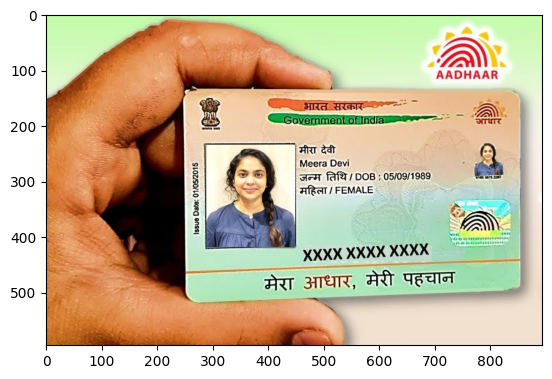

In [3]:
img_path = "data\\01_raw_data\\adhar_2.png"

rgb_img, bgr_img = read_image(img_path)

plt.imshow(rgb_img)

In [4]:
id_card = extract_id_card(bgr_img)

save_image(id_card, filename="id_card.png", path="data\\02_intermediate_data")
# plt.show(id_card)

contours (247, 129, 609, 390)
Area 219243.5
Image saved successfully: data\02_intermediate_data\id_card.png


In [19]:
# text = extract_text(id_card)
# text

# # Specify the language you want to recognize (optional, defaults to English)
# reader = easyocr.Reader(['en'])

# # Replace "path/to/your/image.jpg" with the actual path to your image
# image_path = "data\\02_intermediate_data\\id_card.png"

# # Read the image and extract text
# result = reader.readtext(image_path)

# # # Print the extracted text
# # for text in result:
# #     print(text['text'])

# for text in result:
#     print(text)

In [17]:
txt = extract_text_with_confidence(image_path)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [18]:
# plt.imshow(contours)
# len(contours)
txt

{'Government ofIndia': [[177, 51], [366, 51], [366, 75], [177, 75]],
 'Meera Devi': [[209, 129], [303, 129], [303, 149], [209, 149]],
 'DOB': [[307, 153], [349, 153], [349, 173], [307, 173]],
 '05/09/1989': [[358, 150], [450, 150], [450, 174], [358, 174]],
 'FEMALE': [[271, 177], [345, 177], [345, 197], [271, 197]],
 'XXXX XXXX XXXX': [[211, 279], [449, 279], [449, 321], [211, 321]]}

In [48]:

# largest_contour = None
# largest_area = 0
# for cnt in contours:
#     area = cv2.contourArea(cnt)
#     if area > largest_area:
#         largest_contour = cnt
#         largest_area = area

In [56]:
# print(largest_area, largest_contour)

# # Get bounding rectangle of the largest contour
# x, y, w, h = cv2.boundingRect(largest_contour)

# x, y, w, h

In [32]:
# plt.imshow(rgb_img[y:y+h, x:x+w])